In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, thousands=' ', decimal=",", match="Коефіцієнт народжуваності в регіонах України")
my_table = pd.DataFrame(tables[0])
print(my_table.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [24]:
print(my_table.shape)

(28, 9)


In [25]:
new_table = my_table.copy()
new_table.replace('—', pd.NA, inplace=True)
print(new_table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  <NA>  <NA>
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2  <NA>
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1  <NA>
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [26]:
print(new_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [34]:
num_obj_columns = new_table.select_dtypes(include=['object'])

for i in num_obj_columns.columns:
  if i != 'Регіон':
    new_table[i] = pd.to_numeric(new_table[i], errors='coerce')

print(new_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [37]:
print(new_table.isnull().sum(axis=0) / len(new_table))

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [38]:
print(new_table.drop(new_table.index[len(new_table)-1]))

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [40]:
average = new_table.mean(axis=0, numeric_only=True)
print(average)

new_table = new_table.fillna(average)
print(new_table)

1950    23.092308
1960    20.748148
1970    15.585185
1990    13.042857
2000     8.207143
2012    11.646429
2014    11.142308
2019     8.020833
dtype: float64
               Регіон       1950       1960       1970  1990  2000  2012  \
0                Крим  23.000000  20.600000  16.000000  13.0   7.3  12.6   
1           Вінницька  22.400000  19.200000  14.200000  12.4   8.4  11.2   
2           Волинська  24.700000  25.000000  17.900000  15.3  11.2  14.8   
3    Дніпропетровська  20.400000  20.400000  15.100000  12.3   7.1  11.2   
4            Донецька  27.100000  21.400000  14.000000  10.9   6.1   9.8   
5         Житомирська  26.100000  22.300000  15.900000  12.9   8.9  12.2   
6        Закарпатська  31.400000  27.300000  20.700000  16.8  11.5  15.1   
7          Запорізька  21.900000  19.700000  15.000000  12.4   7.1  10.6   
8   Івано-Франківська  24.300000  24.800000  18.200000  15.5  10.3  12.4   
9            Київська  20.400000  18.900000  15.600000  12.3   7.3  12.2   
10   

In [44]:
y2019 = new_table.mean(axis=0, numeric_only=True)['2019']
print(y2019)
new_table[new_table['2019'] > y2019]

8.020833333333334


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400000,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100000,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900000,26.7,19.3,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800000,21.4,16.6,14.3,8.5,11.7,11.5,8.1
23,Чернівецька,24.700000,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,23.092308,17.4,15.9,12.0,7.3,12.0,12.1,11.0
27,Україна,22.800000,20.5,15.2,12.6,7.8,11.4,11.1,8.1


In [45]:
new_table[new_table['2014'] == new_table['2014'].max()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.9,26.7,19.3,15.8,11.8,15.9,14.8,10.7


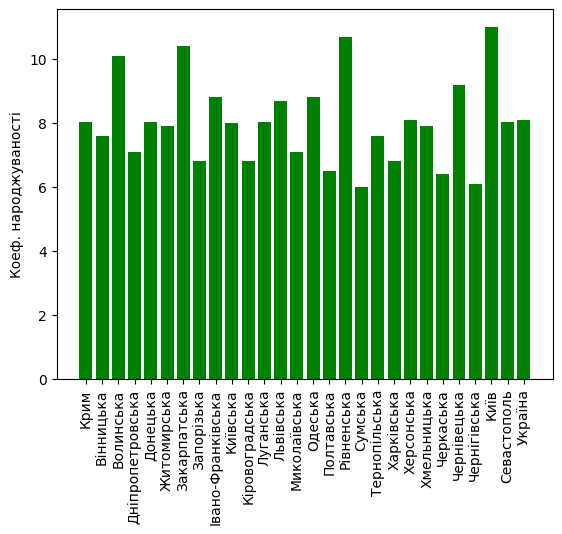

In [46]:
plt.bar(new_table['Регіон'],new_table['2019'], color='g')
plt.xticks(rotation=90)
plt.ylabel('Коеф. народжуваності')
plt.show()